In [1]:
# Linear Regression
# Decision Tree Regression
# Random Forest Regression
# Support Vector Regression
# Ridge Regression
# K-Nearest Neighbors Regression


## LinearRegression (SelectKBest included)

Mean Squared Error: 4.792874677085721e-05
Mean Absolute Error: 0.004855861624451264
R-squared: 0.36488845339183795


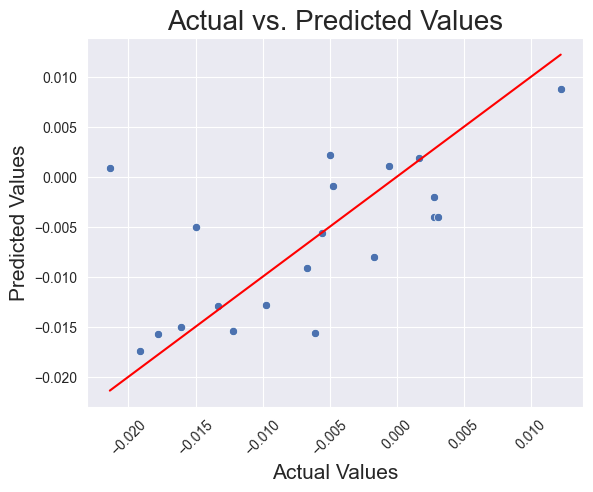

Selected features: Index(['X_min', 'X_mean', 'B_max', 'B_mean', 'adjustment'], dtype='object')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a Pandas dataframe
data = pd.read_csv('C:/Users/00220401626/Desktop/Regression.csv', encoding='cp932')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Angl_gosa', axis=1),  
    data['Angl_gosa'],             
    test_size=0.2,                      
    random_state=42                     
)

# Select the k best features using the f_regression method
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)  # Get the indices of the selected features

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Set up the pipeline with a scaler and a regressor
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])


cv_predictions = cross_val_predict(pipeline, X_train, y_train, cv=5)  # Perform cross-validation
pipeline.fit(X_train, y_train)          # Fit the model on the training dataset
y_pred = pipeline.predict(X_test)      # Predict the target variable for the testing dataset


mse = mean_squared_error(y_test, y_pred) # Calculate the mean squared error between predicted and actual values
r2 = pipeline.score(X_test, y_test)     # Calculate the R-squared value
mae = np.mean(np.abs(y_test - y_pred))  # Calculate the mean absolute error

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


plt.figure(figsize=(6.4, 4.8))
sns.set_style('darkgrid')  
sns.set_palette('deep')     
sns.scatterplot(x=y_test, y=y_pred)  
sns.lineplot(x=y_test, y=y_test, color='red') 
plt.title('Actual vs. Predicted Values',fontsize=20)  
plt.xlabel('Actual Values', fontsize=15)  
plt.ylabel('Predicted Values',fontsize=15)  
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(rotation=0, fontsize=10)
plt.show()  
# Print the selected features
print('Selected features:', X.columns[selected_features])


Mean Squared Error: 4.7928746770857146e-05
Mean Absolute Error: 0.004855861624451262
R-squared: 0.36488845339183873


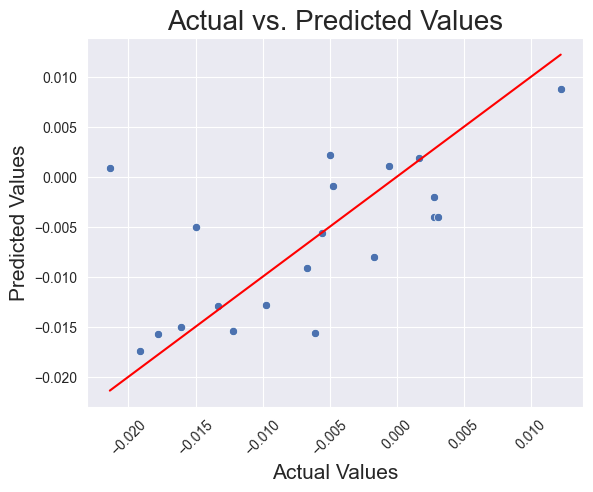

Selected features: Index(['X_min', 'X_mean', 'B_max', 'B_mean', 'adjustment'], dtype='object')


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data into a Pandas dataframe
df = pd.read_csv('C:/Users/00220401626/Desktop/Regression.csv', encoding='cp932')

# Split the data into features and target variable
X = df.drop('Angl_gosa', axis=1)
y = df['Angl_gosa']

# Select the k best features using the f_regression method
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)  # Get the indices of the selected features

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Set up the pipeline with a scaler and a regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Set up hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False],
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

cv_predictions = cross_val_predict(grid_search, X_train, y_train, cv=5)  # Perform cross-validation
grid_search.fit(X_train, y_train)         
y_pred = grid_search.predict(X_test)    


mse = mean_squared_error(y_test, y_pred) 
r2 = grid_search.score(X_test, y_test)    
mae = mean_absolute_error(y_test, y_pred) 

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


plt.figure(figsize=(6.4, 4.8))
sns.set_style('darkgrid')  
sns.set_palette('deep')     
sns.scatterplot(x=y_test, y=y_pred)  
sns.lineplot(x=y_test, y=y_test, color='red') 
plt.title('Actual vs. Predicted Values',fontsize=20)  
plt.xlabel('Actual Values', fontsize=15)  
plt.ylabel('Predicted Values',fontsize=15)  
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(rotation=0, fontsize=10)
plt.show()  
# Print the selected features
print('Selected features:', X.columns[selected_features])